In [24]:
import os
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '.2'

from algorithms.utils import restore_state_multi_agent
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib as mpl
import matplotlib.pyplot as plt

In [25]:
directory = '/media/samuele/Disco/PycharmProjectsUbuntu/MARL-CER/trained_agents_to_keep/server_06-07/aided/20250507_015637_bat_net_type_actor_critic_rec_net_type_actor_critic_lr_bat_5e-05_lr_REC_cosine_tot_timesteps_14016000_lr_sched_cosine_multiagent'

networks_batteries, network_rec, config, world_metadata, train_info, val_info = restore_state_multi_agent(directory)

{'ACTIVATION': 'tanh', 'ACTOR_LOSS_IMITATION_LEARNING_SCALE': 20, 'BATTERY_ACTION_SPACE_SIZE': 1, 'BATTERY_OBS_IS_NORMALIZABLE': {'buying_price': True, 'cos_day_of_year': False, 'cos_seconds_of_day': False, 'demand': True, 'generation': True, 'network_REC_minus': True, 'network_REC_plus': True, 'selling_price': True, 'sin_day_of_year': False, 'sin_seconds_of_day': False, 'soc': False, 'temperature': True}, 'BATTERY_OBS_IS_SEQUENCE': {'buying_price': True, 'cos_day_of_year': False, 'cos_seconds_of_day': False, 'demand': True, 'generation': True, 'network_REC_minus': True, 'network_REC_plus': True, 'selling_price': True, 'sin_day_of_year': False, 'sin_seconds_of_day': False, 'soc': True, 'temperature': True}, 'BATTERY_OBS_KEYS': ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus'), 'BATTERY_VALUES_IN_REC_OBS_CRI': False, 'CLIP_EPS': 0.2, 'D

In [26]:
config

{'ACTIVATION': 'tanh',
 'ACTOR_LOSS_IMITATION_LEARNING_SCALE': 20,
 'BATTERY_ACTION_SPACE_SIZE': 1,
 'BATTERY_OBS_IS_NORMALIZABLE': {'buying_price': True,
  'cos_day_of_year': False,
  'cos_seconds_of_day': False,
  'demand': True,
  'generation': True,
  'network_REC_minus': True,
  'network_REC_plus': True,
  'selling_price': True,
  'sin_day_of_year': False,
  'sin_seconds_of_day': False,
  'soc': False,
  'temperature': True},
 'BATTERY_OBS_IS_SEQUENCE': {'buying_price': True,
  'cos_day_of_year': False,
  'cos_seconds_of_day': False,
  'demand': True,
  'generation': True,
  'network_REC_minus': True,
  'network_REC_plus': True,
  'selling_price': True,
  'sin_day_of_year': False,
  'sin_seconds_of_day': False,
  'soc': True,
  'temperature': True},
 'BATTERY_OBS_KEYS': ('temperature',
  'soc',
  'demand',
  'generation',
  'buying_price',
  'selling_price',
  'sin_day_of_year',
  'cos_day_of_year',
  'sin_seconds_of_day',
  'cos_seconds_of_day',
  'network_REC_plus',
  'network_R

In [27]:
world_metadata

WorldMetadata(world_train={'num_battery_houses': 3, 'battery_observations': ['demand', 'generation', 'temperature', 'soc', 'day_of_year', 'seconds_of_day', 'selling_price', 'buying_price', 'network_REC_plus', 'network_REC_minus'], 'rec_observations': ['demands_base_battery_houses', 'demands_battery_battery_houses', 'generations_base_battery_houses', 'mean_demands_base', 'mean_demands_batteries', 'mean_generations', 'day_of_year', 'seconds_of_day', 'network_REC_plus', 'network_REC_minus', 'exponential_average_rec_actions_prev_step'], 'demand': {'path': 'ernestogym/ernesto_jax/data/demand/rse_profiles_train.csv', 'timestep': 3600, 'test_profiles': None, 'data_usage': 'end'}, 'generation': {'path': {'battery_houses_generation': ['ernestogym/ernesto_jax/data/generation/Timeseries_45.235_10.693_SA3_3kWp_crystSi_14_30deg_-60deg_2015_2018._train.csv', 'ernestogym/ernesto_jax/data/generation/Timeseries_45.235_10.693_SA3_3kWp_crystSi_14_30deg_0deg_2015_2018._train.csv', 'ernestogym/ernesto_jax/

In [28]:
jax.tree.map(lambda x: jnp.isnan(x).any(axis=jnp.arange(1, x.ndim)), train_info)

{}

In [29]:
jax.tree.map(lambda x: x.shape, val_info)

{'actions_batteries': (22, 43350, 3),
 'actions_rec': (22, 43350, 3),
 'balance_minus': (22, 43350),
 'balance_plus': (22, 43350),
 'buy_prices': (22, 43350, 3),
 'demands': (22, 43350, 3),
 'dones': {'REC_agent': (22, 43350),
  '__all__': (22, 43350),
  'battery_agent_0': (22, 43350),
  'battery_agent_1': (22, 43350),
  'battery_agent_2': (22, 43350)},
 'energy_to_batteries': (22, 43350, 3),
 'generations': (22, 43350, 3),
 'norm_reward': {'r_clipping': (22, 43350, 3),
  'r_deg': (22, 43350, 3),
  'r_glob': (22, 43350, 3),
  'r_op': (22, 43350, 3),
  'r_trad': (22, 43350, 3)},
 'pure_reward': {'r_clipping': (22, 43350, 3),
  'r_deg': (22, 43350, 3),
  'r_glob': (22, 43350, 3),
  'r_op': (22, 43350, 3),
  'r_trad': (22, 43350, 3)},
 'r_tot': (22, 43350, 3),
 'rec_reward': (22, 43350),
 'self_consumption': (22, 43350),
 'sell_prices': (22, 43350, 3),
 'soc': (22, 43350, 3),
 'soh': (22, 43350, 3),
 'tot_incentives': (22, 43350),
 'weig_reward': {'r_clipping': (22, 43350, 3),
  'r_deg': 

In [30]:
val_info['actions_rec']

array([[[3.3333334e-01, 3.3333334e-01, 3.3333334e-01],
        [3.3333334e-01, 3.3333334e-01, 3.3333334e-01],
        [3.3333334e-01, 3.3333334e-01, 3.3333334e-01],
        ...,
        [3.3333334e-01, 3.3333334e-01, 3.3333334e-01],
        [3.3333334e-01, 3.3333334e-01, 3.3333334e-01],
        [3.3333334e-01, 3.3333334e-01, 3.3333334e-01]],

       [[2.6679961e-02, 9.6068782e-01, 1.2632281e-02],
        [3.7372813e-02, 9.4382328e-01, 1.8803874e-02],
        [2.9495606e-02, 9.4566315e-01, 2.4841199e-02],
        ...,
        [3.2401735e-01, 3.2292259e-01, 3.5306013e-01],
        [3.2782078e-01, 3.1942275e-01, 3.5275647e-01],
        [3.2293954e-01, 3.1110275e-01, 3.6595771e-01]],

       [[9.8071402e-01, 1.3263574e-02, 6.0223998e-03],
        [2.6134887e-01, 5.1973629e-01, 2.1891484e-01],
        [1.5335749e-01, 3.0433732e-01, 5.4230517e-01],
        ...,
        [3.3572906e-01, 3.4081227e-01, 3.2345864e-01],
        [3.2421991e-01, 3.5332683e-01, 3.2245326e-01],
        [3.4975550e-01

In [31]:
val_info['r_tot'].shape #.sum(axis=(1, 2)).shape

(22, 43350, 3)

In [32]:
lim = config['NUM_RL_AGENTS'] if 'NUM_RL_AGENTS' in config.keys() else config['NUM_BATTERY_AGENTS']
a = val_info['r_tot'][..., :lim].sum(axis=(1, 2))
a

array([-3322.0547 , -2512.6929 , -1798.9205 , -1465.9066 , -1345.1686 ,
       -1248.8892 , -1228.1445 , -1205.256  , -1158.2822 , -1162.1862 ,
       -1125.7954 , -1056.9232 , -1023.43555, -1044.5801 ,  -991.7685 ,
       -1025.925  , -1042.51   , -1061.42   , -1071.0498 , -1079.5634 ,
       -1090.5201 , -1100.4565 ], dtype=float32)

In [33]:
val_info['r_tot'].shape

(22, 43350, 3)

In [34]:
val_info['r_tot'][7, :].sum(axis=0)

array([-501.16254, -475.41507, -228.67969], dtype=float32)

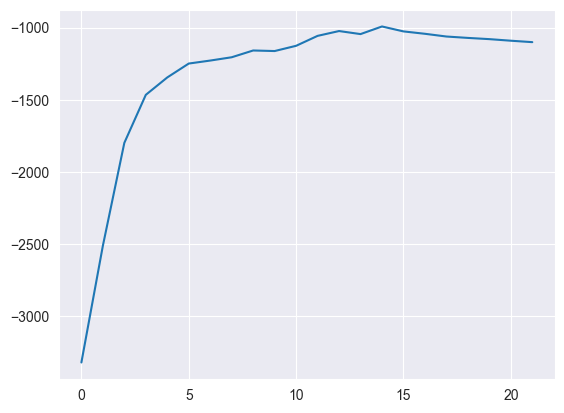

In [35]:
plt.plot(a)

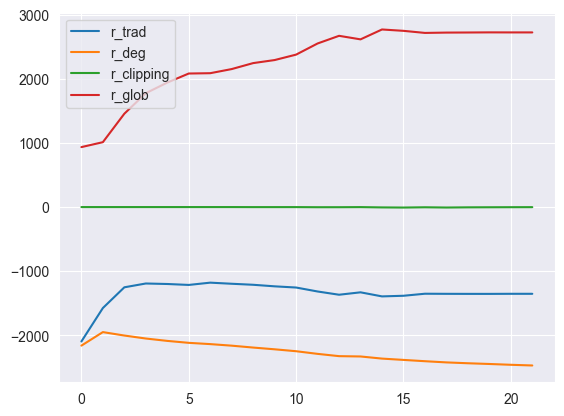

In [36]:
plt.plot(val_info['weig_reward']['r_trad'][..., :lim].sum(axis=(1, 2)), label='r_trad')
plt.plot(val_info['weig_reward']['r_deg'][..., :lim].sum(axis=(1, 2)), label='r_deg')
plt.plot(val_info['weig_reward']['r_clipping'][..., :lim].sum(axis=(1, 2)), label='r_clipping')
plt.plot(val_info['weig_reward']['r_glob'][..., :lim].sum(axis=(1, 2)), label='r_glob')
plt.legend()

In [37]:
cmap = mpl.colormaps['plasma']
n_agents = config['NUM_BATTERY_AGENTS']
colors = cmap(np.linspace(0, 1, n_agents))

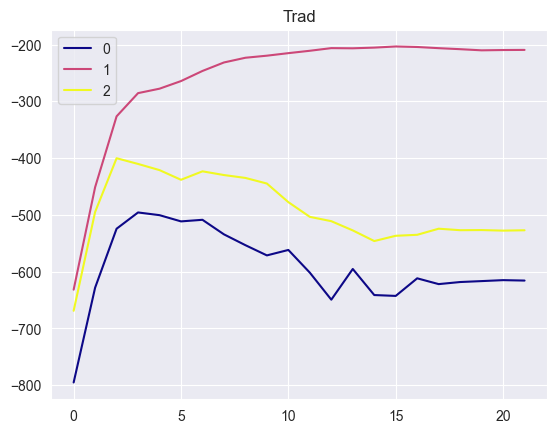

In [38]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_trad'].sum(axis=1)[:, i], color=colors[i], label=f'{i}')
    plt.title('Trad')
    plt.legend()

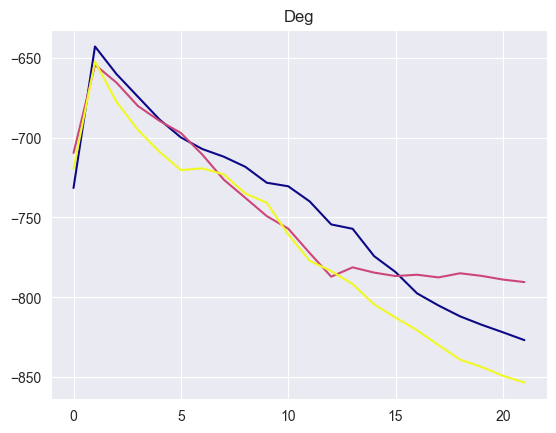

In [39]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_deg'].sum(axis=1)[:, i], color=colors[i])
    plt.title('Deg')

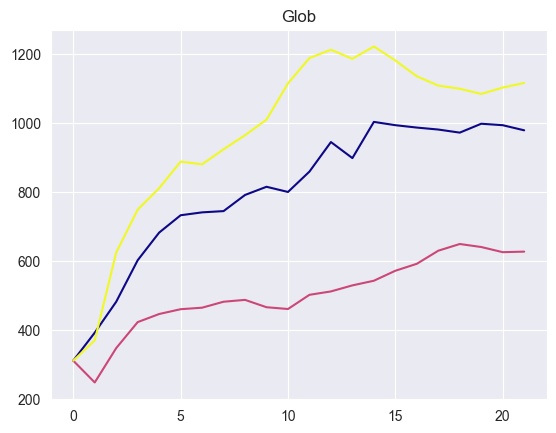

In [40]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_glob'].sum(axis=1)[:, i], color=colors[i])
    plt.title('Glob')

In [41]:
val_info['rec_reward'].sum(axis=1)

array([ 5045156.5,  5463405.5,  7894139. ,  9644679. , 10546745. ,
       11303712. , 11321612. , 11660949. , 12170634. , 12417051. ,
       12887410. , 13838508. , 14489807. , 14196700. , 15039223. ,
       14917051. , 14741674. , 14767730. , 14777398. , 14787627. ,
       14784567. , 14784897. ], dtype=float32)

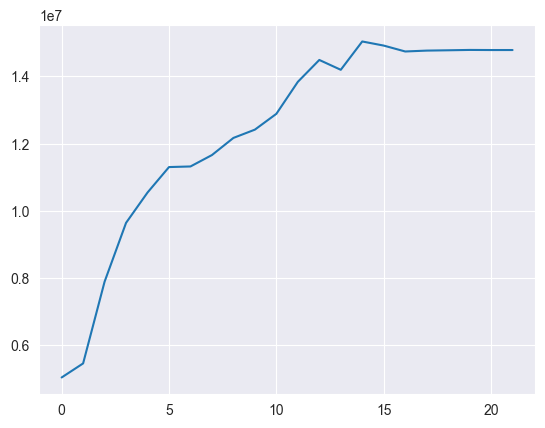

In [42]:
plt.plot(val_info['rec_reward'].sum(axis=1))

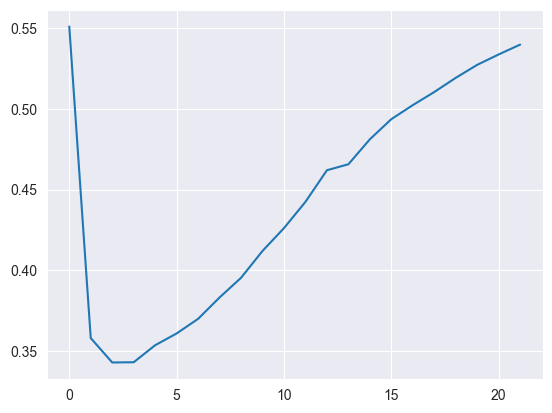

In [43]:
plt.plot(val_info['soc'][..., :lim].mean(axis=(1, 2)))

In [44]:
np.var(val_info['actions_rec'], axis=-1).shape

(22, 43350)

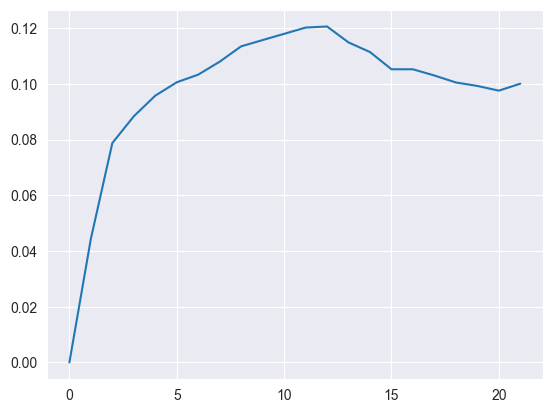

In [45]:
plt.plot(np.var(val_info['actions_rec'], axis=-1).mean(axis=1))

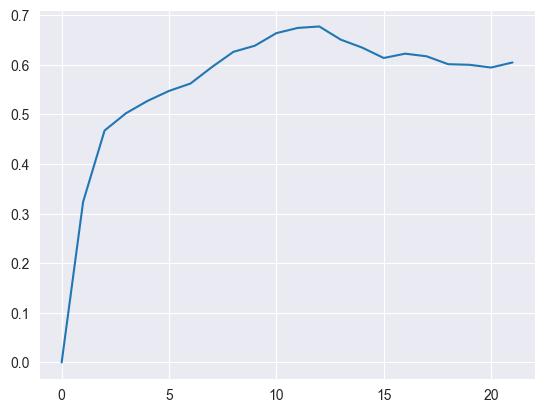

In [46]:
plt.plot(np.mean(np.max(val_info['actions_rec'], axis=-1) - np.min(val_info['actions_rec'], axis=-1), axis=1))